In [1]:
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/NUEVO_PROYECTO/data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
os.listdir(data_dir)

['happy', 'sad']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/NUEVO_PROYECTO/data')

Found 880 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))
for idx, img in enumerate(batch[0][:12]):
    ax[idx // 4, idx % 4].imshow(img.astype(int))
    ax[idx // 4, idx % 4].title.set_text(batch[1][idx])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.8666667 , 0.6745098 , 0.3137255 ],
          [0.8710478 , 0.67889094, 0.31810662],
          [0.8745098 , 0.68235296, 0.32156864],
          ...,
          [0.9098039 , 0.75686276, 0.39215687],
          [0.90588236, 0.7529412 , 0.3882353 ],
          [0.8980392 , 0.74509805, 0.38039216]],
 
         [[0.8666667 , 0.6745098 , 0.3137255 ],
          [0.8710478 , 0.67889094, 0.31810662],
          [0.8745098 , 0.68235296, 0.32156864],
          ...,
          [0.9098039 , 0.75686276, 0.39215687],
          [0.90588236, 0.7529412 , 0.3882353 ],
          [0.8980392 , 0.74509805, 0.38039216]],
 
         [[0.87058824, 0.6784314 , 0.31764707],
          [0.8779718 , 0.685815  , 0.32503062],
          [0.8784314 , 0.6862745 , 0.3254902 ],
          ...,
          [0.9098039 , 0.75686276, 0.39215687],
          [0.9098039 , 0.75686276, 0.39215687],
          [0.8980392 , 0.74509805, 0.38039216]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [15]:
len(data)

28

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

19

In [18]:
val_size

5

In [19]:
test_size

2

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, Rescaling

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# 7. Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=500, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/500
19/19 [==============================] - 25s 915ms/step - loss: 0.7320 - accuracy: 0.5329 - val_loss: 0.6857 - val_accuracy: 0.5562
Epoch 2/500
19/19 [==============================] - 21s 921ms/step - loss: 0.6784 - accuracy: 0.5839 - val_loss: 0.6822 - val_accuracy: 0.5562
Epoch 3/500
19/19 [==============================] - 16s 780ms/step - loss: 0.6644 - accuracy: 0.6102 - val_loss: 0.6401 - val_accuracy: 0.6500
Epoch 4/500
19/19 [==============================] - 16s 776ms/step - loss: 0.6148 - accuracy: 0.6743 - val_loss: 0.6143 - val_accuracy: 0.6687
Epoch 5/500
19/19 [==============================] - 17s 815ms/step - loss: 0.5416 - accuracy: 0.7270 - val_loss: 0.5945 - val_accuracy: 0.6875
Epoch 6/500
19/19 [==============================] - 15s 726ms/step - loss: 0.5061 - accuracy: 0.7615 - val_loss: 0.5898 - val_accuracy: 0.7375
Epoch 7/500
19/19 [==============================] - 16s 778ms/step - loss: 0.4851 - accuracy: 0.7845 - val_loss: 0.6031 - val_accuracy:

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


# 8. Plot Performance

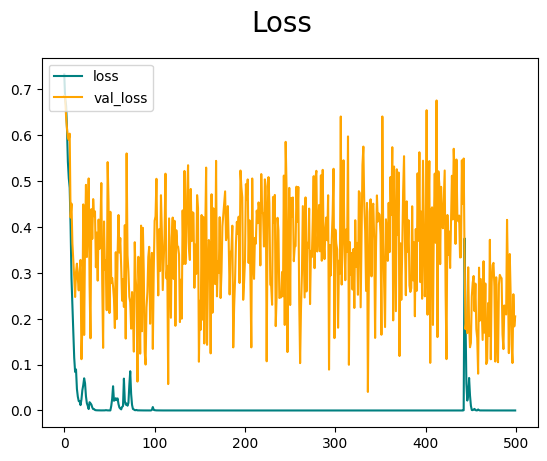

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

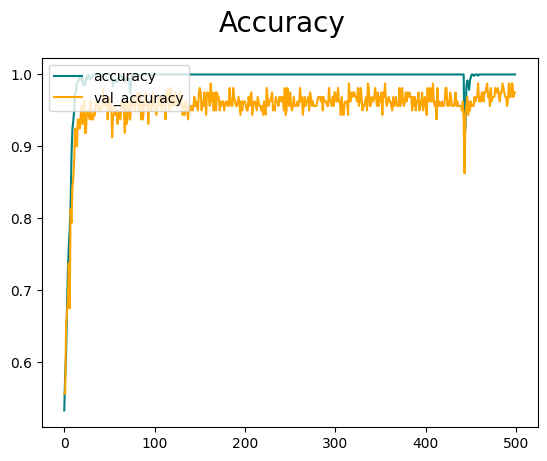

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 29ms/step


In [40]:
print(f'Precision:{pre.result().numpy()}, Recal:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.875, Recal:0.9545454382896423, Accuracy:0.9375


# 10. Test

In [41]:
import cv2

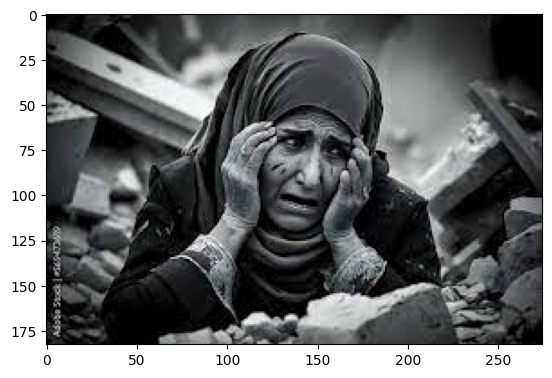

In [54]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/NUEVO_PROYECTO/img_test/sad_test/descarga (2).jpeg')
plt.imshow(img)
plt.show()

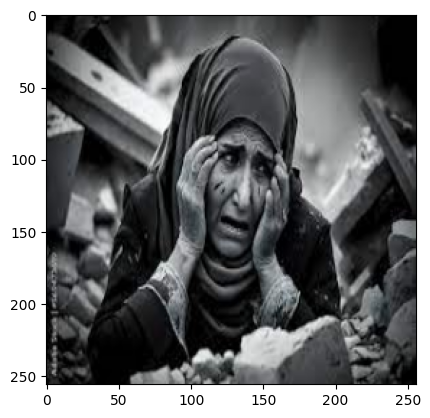

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
np.expand_dims(resize, axis=0).shape

(1, 256, 256, 3)

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [58]:
yhat

array([[1.]], dtype=float32)

In [59]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad



# 11. Save the Model

In [60]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/NUEVO_PROYECTO','imageclassifier.h5'))

In [67]:
new_model = load_model('imageclassifier.h5')

In [68]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[1.]], dtype=float32)